<img width="600" src="http://linux.ria.ua/img/articles/numberplate_detection/nomeroff_net.png" alt="Nomeroff Net. Automatic numberplate recognition system"/>


## The example demonstrates license plate mask recognition.

In [1]:
# Import all necessary libraries.
import sys
import os
import json
import matplotlib.image as mpimg
from matplotlib import pyplot as plt

In [2]:
# Load default configuration file.
with open('../config/default.json') as data_file:
    config = json.load(data_file)
    
sys.path.append(os.path.abspath(config["NOMEROFF_NET"]["ROOT"]))

In [3]:
# Import license plate recognition tools.
from NomeroffNet import Detector, filters

In [4]:
# Initialize the detector with default configuration file.
nnet = Detector(config)

In [5]:
# Load weights in keras format.
nnet.loadModel()

Using TensorFlow backend.


В метод nnet.detect передаётся массив путей к изображениям, которые обрабатываются одновременно, если у вас стоит GPU измените в [конфигурационном файле](https://github.com/ria-com/nomeroff-net/blob/master/docs/CONFIG.md/ "Детальнее о конфигурационном файле") параметр **IMAGES_PER_GPU** и передайте в функцию указанное количество изображений, это значительно увеличит скорость распознания

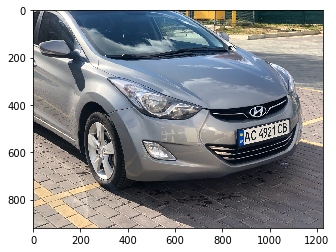

/usr/local/lib64/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


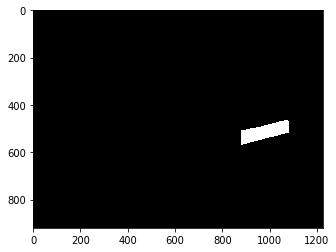

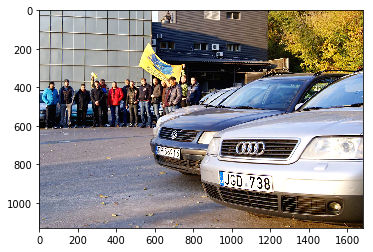

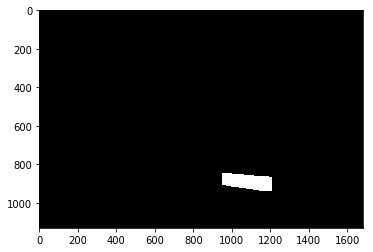

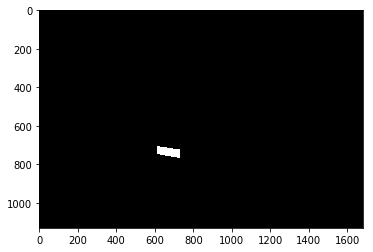

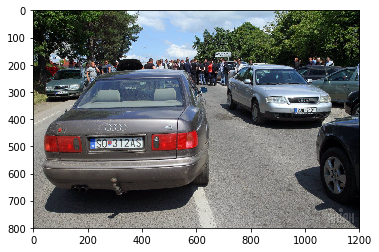

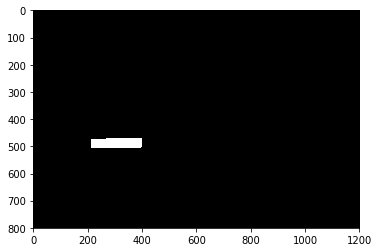

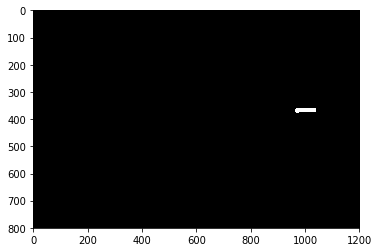

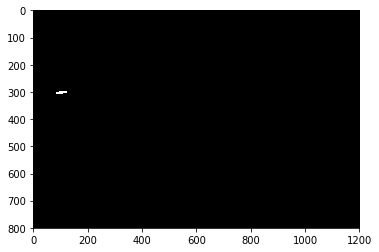

In [6]:
# Walking through the ./examples/images/ directory and checking each of the images for license plates.
rootDir = 'images/'

for dirName, subdirList, fileList in os.walk(rootDir):
    for fname in fileList:
        img_path = os.path.join(dirName, fname)
        
        np = nnet.detect([img_path])
        
        img = mpimg.imread(img_path)
        plt.imshow(img)
        plt.show()
        
        # Generate masks.
        masks = filters.mask(np)
        for mask in masks:
            plt.imshow(mask)
            plt.show()
plt.show()